In [1]:
import sys
sys.path.append("../src")

import os
from pathlib import Path
from typing import List, Tuple

# Third-Party Imports
import cv2
import pyvips
import tifffile
import numpy as np
from tqdm import tqdm
from empatches import EMPatches
import matplotlib.pyplot as plt

# Local Imports
from utils import get_args, save_patch_args

/home/ipv/miniconda3/envs/pytorch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = os.path.join("..", "..", "raw-data", "patches-test", "experiment-0", "10336")
img_names = os.listdir(data_dir)

print("num images:", len(img_names))

num images: 2949


In [3]:
data_dir = os.path.join("..", "..", "raw-data", "patches", "experiment-0", "10336")
img_names = os.listdir(data_dir)

print("num images:", len(img_names))

num images: 147456


In [4]:
def extract_coords(img_name: List[str]):

    stem = Path(img_name).stem
    y1, y2, x1, x2 = [int(c) for c in stem.split("-")[1:]]
    coords = (y1, y2, x1, x2)

    return coords

def get_checkpoint(indices):
    for i, index in enumerate(indices):
        if index[2] != 0:
            checkpoint = i
            
            return checkpoint
        
def adjust_indices(indices, new_size):
    checkpoint = get_checkpoint(indices)
    placeholder = [0, new_size, 0, new_size]
    new_indices = []

    for i in range(len(indices)):
        if i % checkpoint == 0 and i > 0:
            placeholder[0] = 0
            placeholder[1] = new_size

            placeholder[2] += new_size
            placeholder[3] += new_size

        y1, y2, = placeholder[0], placeholder[1]
        x1, x2 = placeholder[2], placeholder[3]
        new_indices.append((y1, y2, x1, x2))

        placeholder[0] += new_size
        placeholder[1] += new_size

    return new_indices

In [4]:
img_paths = [os.path.join(data_dir, i) for i in img_names]
img_patches = [pyvips.Image.new_from_file(f).numpy() for f in img_paths]

new_size = (32, 32)
resized_image_patches = [cv2.resize(image, new_size) for image in img_patches]

In [9]:
coords = [extract_coords(path) for path in img_paths]

coords

[(0, 224, 0, 224),
 (224, 448, 0, 224),
 (448, 672, 0, 224),
 (672, 896, 0, 224),
 (896, 1120, 0, 224),
 (1120, 1344, 0, 224),
 (1344, 1568, 0, 224),
 (1568, 1792, 0, 224),
 (1792, 2016, 0, 224),
 (2016, 2240, 0, 224),
 (2240, 2464, 0, 224),
 (2464, 2688, 0, 224),
 (2688, 2912, 0, 224),
 (2912, 3136, 0, 224),
 (3136, 3360, 0, 224),
 (3360, 3584, 0, 224),
 (3584, 3808, 0, 224),
 (3808, 4032, 0, 224),
 (4032, 4256, 0, 224),
 (4256, 4480, 0, 224),
 (4480, 4704, 0, 224),
 (4704, 4928, 0, 224),
 (4928, 5152, 0, 224),
 (5152, 5376, 0, 224),
 (5376, 5600, 0, 224),
 (5600, 5824, 0, 224),
 (5824, 6048, 0, 224),
 (6048, 6272, 0, 224),
 (6272, 6496, 0, 224),
 (6496, 6720, 0, 224),
 (6720, 6944, 0, 224),
 (6944, 7168, 0, 224),
 (7168, 7392, 0, 224),
 (7392, 7616, 0, 224),
 (7616, 7840, 0, 224),
 (7840, 8064, 0, 224),
 (8064, 8288, 0, 224),
 (8288, 8512, 0, 224),
 (8512, 8736, 0, 224),
 (8736, 8960, 0, 224),
 (8960, 9184, 0, 224),
 (9184, 9408, 0, 224),
 (9408, 9632, 0, 224),
 (9632, 9856, 0, 224),

In [10]:
adjusted_coords = adjust_indices(coords, new_size[0])

adjusted_coords

[(0, 32, 0, 32),
 (32, 64, 0, 32),
 (64, 96, 0, 32),
 (96, 128, 0, 32),
 (128, 160, 0, 32),
 (160, 192, 0, 32),
 (192, 224, 0, 32),
 (224, 256, 0, 32),
 (256, 288, 0, 32),
 (288, 320, 0, 32),
 (320, 352, 0, 32),
 (352, 384, 0, 32),
 (384, 416, 0, 32),
 (416, 448, 0, 32),
 (448, 480, 0, 32),
 (480, 512, 0, 32),
 (512, 544, 0, 32),
 (544, 576, 0, 32),
 (576, 608, 0, 32),
 (608, 640, 0, 32),
 (640, 672, 0, 32),
 (672, 704, 0, 32),
 (704, 736, 0, 32),
 (736, 768, 0, 32),
 (768, 800, 0, 32),
 (800, 832, 0, 32),
 (832, 864, 0, 32),
 (864, 896, 0, 32),
 (896, 928, 0, 32),
 (928, 960, 0, 32),
 (960, 992, 0, 32),
 (992, 1024, 0, 32),
 (1024, 1056, 0, 32),
 (1056, 1088, 0, 32),
 (1088, 1120, 0, 32),
 (1120, 1152, 0, 32),
 (1152, 1184, 0, 32),
 (1184, 1216, 0, 32),
 (1216, 1248, 0, 32),
 (1248, 1280, 0, 32),
 (1280, 1312, 0, 32),
 (1312, 1344, 0, 32),
 (1344, 1376, 0, 32),
 (1376, 1408, 0, 32),
 (1408, 1440, 0, 32),
 (1440, 1472, 0, 32),
 (1472, 1504, 0, 32),
 (1504, 1536, 0, 32),
 (1536, 1568, 0

In [11]:
emp = EMPatches()
merged = emp.merge_patches(resized_image_patches, adjusted_coords).astype("uint8")

In [12]:
merged.shape

(12288, 12288, 3)

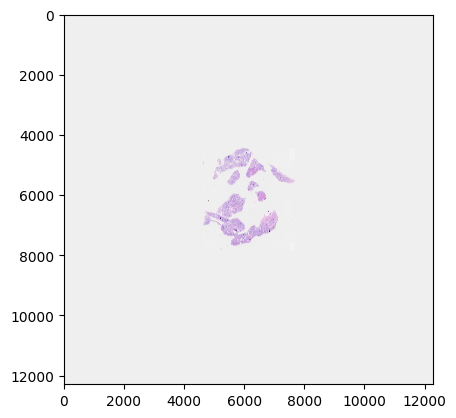

In [13]:
plt.imshow(merged)
plt.show()

In [8]:
plt.imsave("test.png", merged.astype("uint8"))

In [15]:
def merge_patches(patches, coords):
    orig_height = max([c[1] for c in coords])
    orig_width = max([c[3] for c in coords])
    
    num_channels = patches[0].shape[-1]
    merged_img = np.zeros((orig_height, orig_width, num_channels), dtype=np.float32)

    for i, coord in enumerate(coords):
        merged_img[coord[0] : coord[1], coord[2] : coord[3], :] = patches[i]

    return merged_img


In [16]:
merged = merge_patches(resized_image_patches, adjusted_coords).astype("uint8")

In [17]:
merged.shape

(12288, 12288, 3)

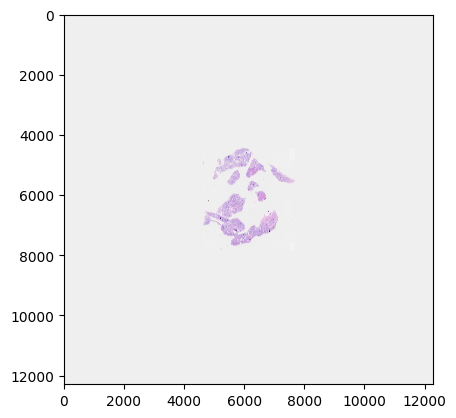

In [18]:
plt.imshow(merged)
plt.show()

In [15]:
plt.imsave("test.png", merged.astype("uint8"))